# Data Analysis for Recommendation System

**Mục tiêu:** Phân tích dữ liệu user-product interactions để xây dựng hệ thống gợi ý sản phẩm

**Nội dung:**
1. Load dữ liệu từ database
2. Thống kê cơ bản
3. Phân tích phân bố dữ liệu
4. Visualization

## 1️ Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

# Cấu hình matplotlib để hiển thị đẹp
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Cấu hình kích thước hình
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 2️ Connect to Database

In [16]:
# Database configuration
DB_CONFIG = {
    'host': 'localhost',
    'port': 3306,
    'database': 'ecommerce_db',
    'user': 'root',
    'password': 'root'
}

# Create connection
connection_string = f"mysql+pymysql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"
engine = create_engine(connection_string)

print("Connected to MySQL database!")
print(f"Database: {DB_CONFIG['database']}")

Connected to MySQL database!
Database: ecommerce_db


## 3️ Load Data

In [17]:
# Load user-product views
query_views = """
SELECT 
    user_id,
    product_id,
    view_count,
    last_viewed_at
FROM user_product_views
"""
df_views = pd.read_sql(query_views, engine)

print(f"Loaded {len(df_views):,} user-product view records")
print(f"Date range: {df_views['last_viewed_at'].min()} to {df_views['last_viewed_at'].max()}")

Loaded 8,428 user-product view records
Date range: 2025-05-07 23:43:19.676367 to 2025-12-30 22:57:43.703165


In [18]:
# Load products
query_products = """
SELECT 
    p.id as product_id,
    p.name as product_name,
    p.tags as tags,
    c.name as category_name,
    b.name as brand_name
FROM products p
LEFT JOIN categories c ON p.category_id = c.id
LEFT JOIN brands b ON p.brand_id = b.id
"""
df_products = pd.read_sql(query_products, engine)

# Parse tags from JSON array to list
if 'tags' in df_products.columns:
    import json
    df_products['tags'] = df_products['tags'].apply(
        lambda x: json.loads(x) if pd.notna(x) and x != '' else []
    )
    total_tags = df_products['tags'].apply(len).sum()
    unique_tags = set([tag for tags in df_products['tags'] for tag in tags])
    print(f"Loaded {len(df_products):,} products")
    print(f"Total tags: {total_tags} ({len(unique_tags)} unique)")
else:
    print(f"Loaded {len(df_products):,} products")

Loaded 200 products
Total tags: 817 (351 unique)


In [19]:
# Tag Analysis
print(" TAG ANALYSIS:")
print("=" * 50)

# Extract all tags
all_tags = []
for tags in df_products['tags']:
    all_tags.extend(tags)

# Count tags
from collections import Counter
tag_counts = Counter(all_tags)

print(f"Total tags: {len(all_tags)}")
print(f"Unique tags: {len(tag_counts)}")
print(f"Avg tags per product: {len(all_tags)/len(df_products):.1f}")

# Top 10 most common tags
print("Top 10 Most Common Tags:")
for tag, count in tag_counts.most_common(10):
    print(f"  {tag}: {count} products ({count/len(df_products)*100:.1f}%)")

 TAG ANALYSIS:
Total tags: 817
Unique tags: 351
Avg tags per product: 4.1
Top 10 Most Common Tags:
  rgb: 27 products (13.5%)
  wireless: 22 products (11.0%)
  premium: 16 products (8.0%)
  ddr5: 15 products (7.5%)
  nvme: 15 products (7.5%)
  budget: 13 products (6.5%)
  gaming: 12 products (6.0%)
  reliable: 11 products (5.5%)
  atx: 11 products (5.5%)
  pcie4: 10 products (5.0%)


## 4️ Quick Look at Data

In [20]:
# First few rows
print("User-Product Views (first 5 rows):")
df_views.head()

User-Product Views (first 5 rows):


,user_id,product_id,view_count,last_viewed_at
0,b'/\x18\xd3(\xc9\x06L\x85\xa4\x15\x98\xf7\x1c\...,b'\x00M\x14.\x8d\x8eG\xc9\xb8\x1eI\x16\x8b\xd3...,2,2025-12-14 23:10:25.692646
1,b';md\xe4b E\xa4\x9b\xadm\xae{\xf0\x1f\x03',b'\x00M\x14.\x8d\x8eG\xc9\xb8\x1eI\x16\x8b\xd3...,1,2025-12-13 14:29:41.693740
2,b'Y\x07\xad\xe6\xf5\rG1\x84\x1d]$l6\x90\x06',b'\x00M\x14.\x8d\x8eG\xc9\xb8\x1eI\x16\x8b\xd3...,1,2025-11-11 06:07:01.695165
3,b'[\x80\x8f\xb4k\xd5Ey\xa3jn\xf8\x0cO\xab.',b'\x00M\x14.\x8d\x8eG\xc9\xb8\x1eI\x16\x8b\xd3...,1,2025-11-26 15:04:27.696164
4,b'y\xfd\xe2^\xe7\xe2D\xcf\xa1\xa4\x93\xcb\x13T...,b'\x00M\x14.\x8d\x8eG\xc9\xb8\x1eI\x16\x8b\xd3...,1,2025-11-16 13:56:02.697165


In [21]:
# Data types and info
print("Data Info:")
df_views.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8428 entries, 0 to 8427
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         8428 non-null   object        
 1   product_id      8428 non-null   object        
 2   view_count      8428 non-null   int64         
 3   last_viewed_at  8428 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 263.5+ KB


## 5️ Basic Statistics

In [22]:
# Calculate statistics
n_users = df_views['user_id'].nunique()
n_products = df_views['product_id'].nunique()
n_interactions = len(df_views)
total_views = df_views['view_count'].sum()

# Matrix density
total_cells = n_users * n_products
filled_cells = n_interactions
density = (filled_cells / total_cells) * 100

# Create summary table
summary = pd.DataFrame({
    'Metric': [
        'Total Users',
        'Total Products',
        'Total Interactions',
        'Total View Count',
        'Matrix Density',
        'Matrix Sparsity'
    ],
    'Value': [
        f"{n_users:,}",
        f"{n_products:,}",
        f"{n_interactions:,}",
        f"{total_views:,}",
        f"{density:.2f}%",
        f"{100-density:.2f}%"
    ]
})

print("\n" + "="*50)
print("DATASET SUMMARY")
print("="*50)
display(summary)


DATASET SUMMARY


,Metric,Value
0,Total Users,227
1,Total Products,200
2,Total Interactions,"8,428"
3,Total View Count,"20,412"
4,Matrix Density,18.56%
5,Matrix Sparsity,81.44%


## 6️ Distribution Analysis

In [23]:
# Views per user
views_per_user = df_views.groupby('user_id').size()

print(" VIEWS PER USER:")
print(f"  Min: {views_per_user.min()}")
print(f"  Max: {views_per_user.max()}")
print(f"  Mean: {views_per_user.mean():.1f}")
print(f"  Median: {views_per_user.median():.1f}")

views_per_user.describe()

 VIEWS PER USER:
  Min: 7
  Max: 121
  Mean: 37.1
  Median: 38.0


count    227.000000
mean      37.127753
std       19.149770
min        7.000000
25%       19.000000
50%       38.000000
75%       49.000000
max      121.000000
dtype: float64

In [24]:
# Views per product
views_per_product = df_views.groupby('product_id').size()

print("  VIEWS PER PRODUCT:")
print(f"  Min: {views_per_product.min()}")
print(f"  Max: {views_per_product.max()}")
print(f"  Mean: {views_per_product.mean():.1f}")
print(f"  Median: {views_per_product.median():.1f}")

views_per_product.describe()

  VIEWS PER PRODUCT:
  Min: 16
  Max: 134
  Mean: 42.1
  Median: 28.0


count    200.000000
mean      42.140000
std       33.516071
min       16.000000
25%       23.000000
50%       28.000000
75%       36.250000
max      134.000000
dtype: float64

## 7️ Visualizations

### Distribution Charts

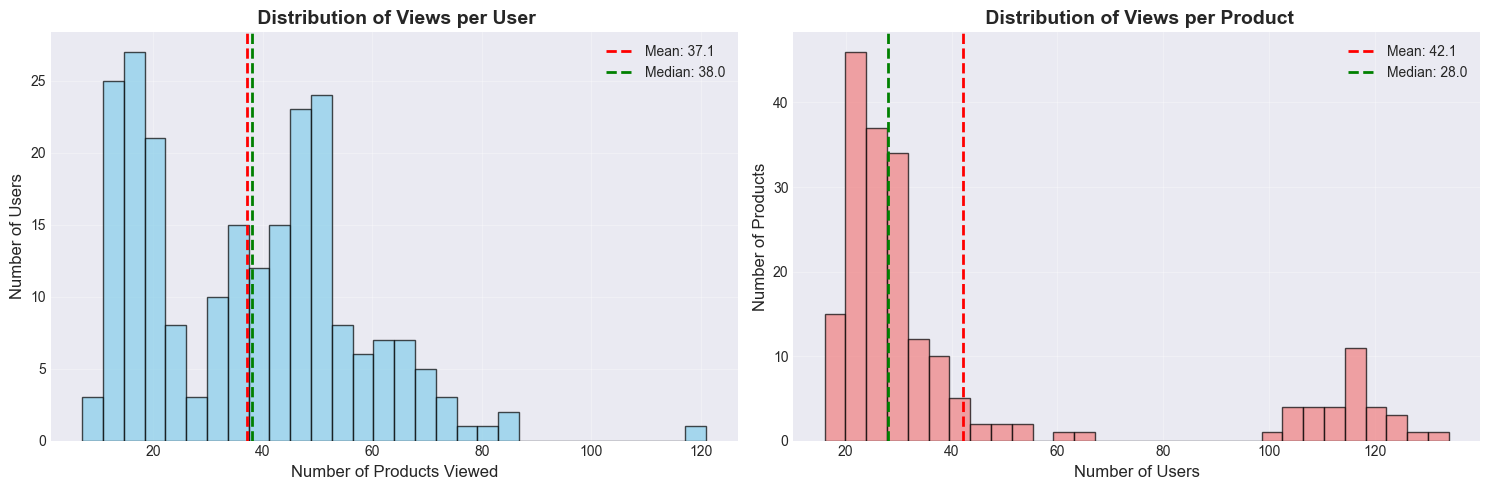

In [25]:
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Views per User
axes[0].hist(views_per_user, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(views_per_user.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {views_per_user.mean():.1f}')
axes[0].axvline(views_per_user.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {views_per_user.median():.1f}')
axes[0].set_xlabel('Number of Products Viewed', fontsize=12)
axes[0].set_ylabel('Number of Users', fontsize=12)
axes[0].set_title(' Distribution of Views per User', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Views per Product
axes[1].hist(views_per_product, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].axvline(views_per_product.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {views_per_product.mean():.1f}')
axes[1].axvline(views_per_product.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {views_per_product.median():.1f}')
axes[1].set_xlabel('Number of Users', fontsize=12)
axes[1].set_ylabel('Number of Products', fontsize=12)
axes[1].set_title(' Distribution of Views per Product', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



### User Segmentation

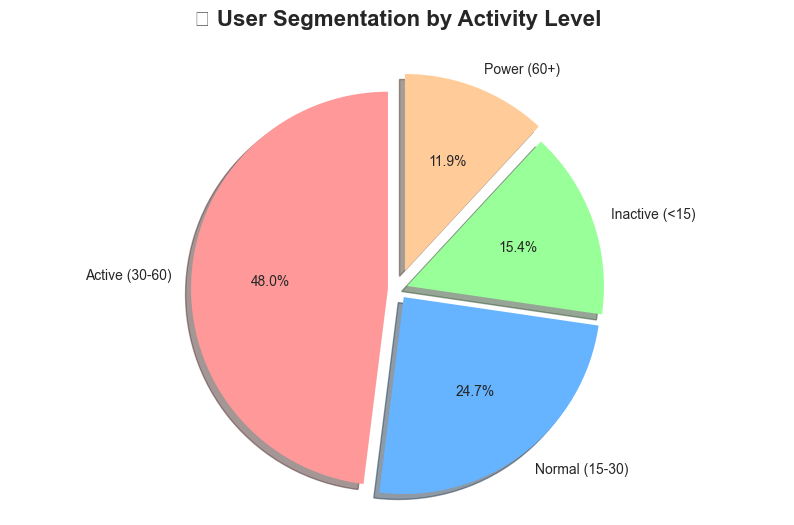


User Segments:
  Active (30-60): 109 users (48.0%)
  Normal (15-30): 56 users (24.7%)
  Inactive (<15): 35 users (15.4%)
  Power (60+): 27 users (11.9%)


In [26]:
# Segment users by activity level
user_segments = pd.cut(views_per_user, 
                       bins=[0, 15, 30, 60, float('inf')],
                       labels=['Inactive (<15)', 'Normal (15-30)', 'Active (30-60)', 'Power (60+)'])

segment_counts = user_segments.value_counts()

# Pie chart
plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.05, 0.05, 0.05, 0.1)  # Explode Power users

plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('👥 User Segmentation by Activity Level', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()

print("\nUser Segments:")
for segment, count in segment_counts.items():
    print(f"  {segment}: {count} users ({count/len(views_per_user)*100:.1f}%)")

### Top Products

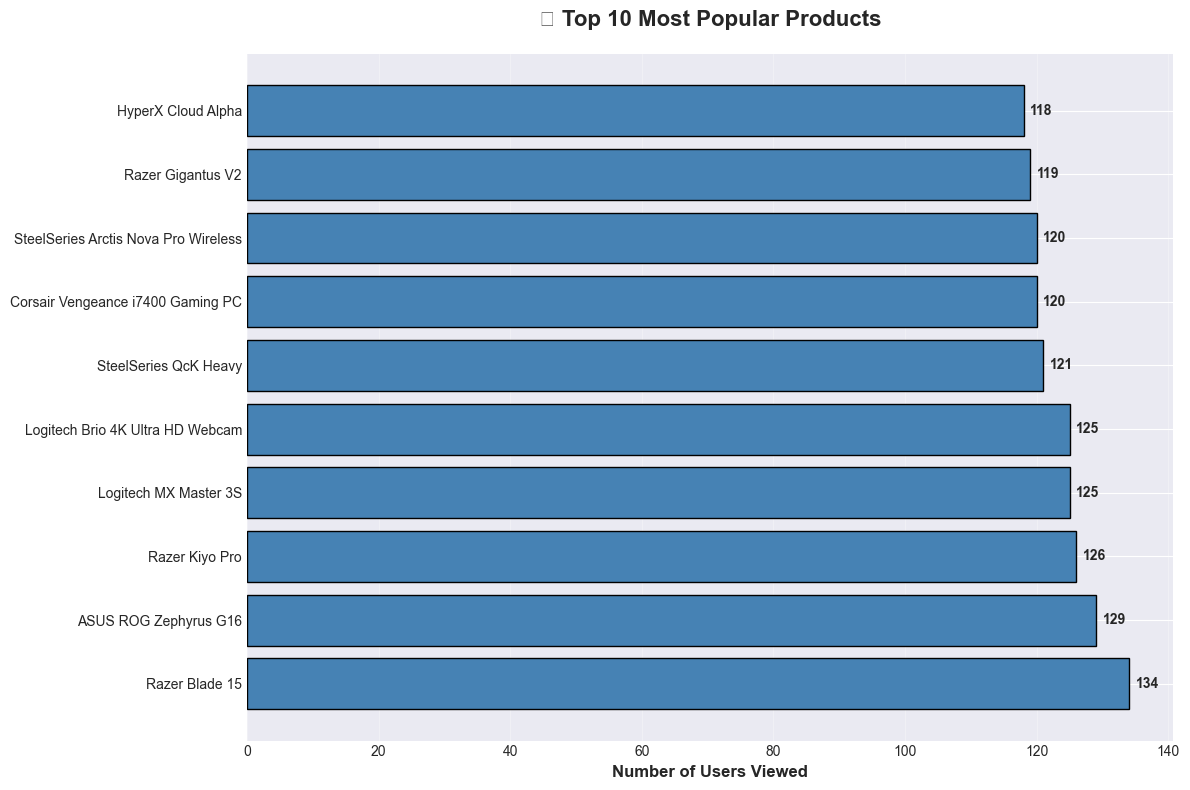

In [27]:
# Top 10 most viewed products
top_products = views_per_product.nlargest(10)

# Get product names
top_product_names = []
for product_id in top_products.index:
    name = df_products[df_products['product_id'] == product_id]['product_name'].values
    if len(name) > 0:
        # Truncate long names
        product_name = name[0]
        if len(product_name) > 40:
            product_name = product_name[:37] + "..."
        top_product_names.append(product_name)
    else:
        top_product_names.append("Unknown")

# Horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_products)), top_products.values, color='steelblue', edgecolor='black')
plt.yticks(range(len(top_products)), top_product_names, fontsize=10)
plt.xlabel('Number of Users Viewed', fontsize=12, fontweight='bold')
plt.title('🏆 Top 10 Most Popular Products', fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### View Count Heatmap

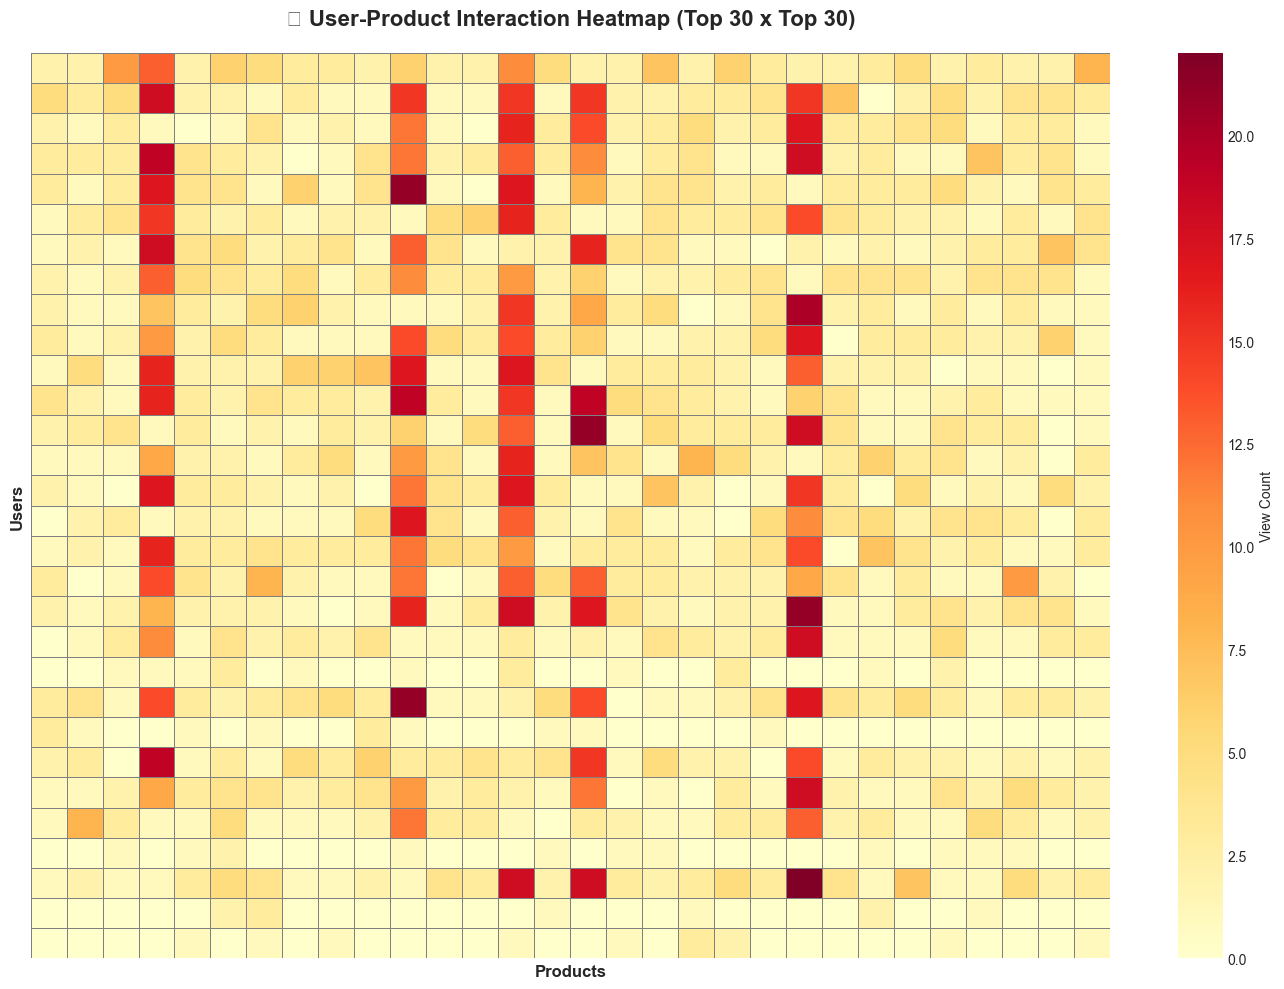

In [28]:
# Create user-item matrix (sample for visualization - top 30 users x top 30 products)
top_30_users = views_per_user.nlargest(30).index
top_30_products = views_per_product.nlargest(30).index

# Filter data
sample_views = df_views[
    df_views['user_id'].isin(top_30_users) & 
    df_views['product_id'].isin(top_30_products)
]

# Create pivot table
heatmap_data = sample_views.pivot_table(
    index='user_id', 
    columns='product_id', 
    values='view_count', 
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'View Count'}, 
            linewidths=0.5, linecolor='gray')
plt.title('🔥 User-Product Interaction Heatmap (Top 30 x Top 30)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Products', fontsize=12, fontweight='bold')
plt.ylabel('Users', fontsize=12, fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()
